## *YOLOv11*

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolo11n-pose.pt")
results = model("https://ultralytics.com/images/bus.jpg")

for result in results:
    xy = result.keypoints.xy
    print("xy",xy)
    xyn = result.keypoints.xyn
    print("xyn",xyn)
    kpts = result.keypoints.data
    print("kpts",kpts)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/bus.jpg: 640x480 4 persons, 369.1ms
Speed: 22.5ms preprocess, 369.1ms inference, 35.6ms postprocess per image at shape (1, 3, 640, 480)
xy tensor([[[1.4236e+02, 4.4186e+02],
         [1.4799e+02, 4.3142e+02],
         [1.3054e+02, 4.3337e+02],
         [1.5230e+02, 4.3752e+02],
         [1.0718e+02, 4.4066e+02],
         [1.5745e+02, 4.9311e+02],
         [9.4264e+01, 4.9925e+02],
         [1.7646e+02, 5.5098e+02],
         [1.1066e+02, 5.6757e+02],
         [1.7422e+02, 5.3235e+02],
         [1.6200e+02, 5.3439e+02],
         [1.4883e+02, 6.4514e+02],
         [9.9666e+01, 6.4941e+02],
         [1.7887e+02, 7.4929e+02],
         [9.4800e+01, 7.5651e+02],
     

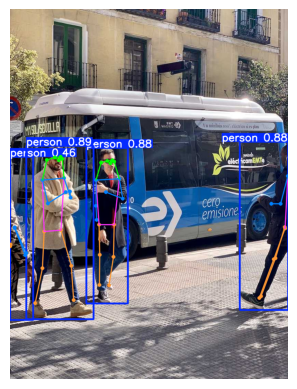

In [4]:
for result in results:
    # Get annotated image (numpy array, BGR format)
    annotated_img = result.plot()

    # Convert BGR → RGB for matplotlib
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Show with matplotlib
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()

In [5]:
input_video = "/content/drive/MyDrive/myosuite/game_4.mp4"
output_video = "output_pose.mp4"
cap = cv2.VideoCapture(input_video)
fps = int(cap.get(cv2.CAP_PROP_FPS))
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [6]:
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video, fourcc, fps, (w, h))

In [7]:
import numpy as np

frame_count = 0
out = cv2.VideoWriter(output_video, fourcc, fps, (w, h))

all_keypoints = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count >1000:
      break
    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    keypoints = results[0].keypoints.data.cpu().numpy()
    all_keypoints.append(keypoints)

    frame_count += 1

cap.release()
out.release()

np.save("detections.npy", np.array(all_keypoints, dtype=object))

print("Done, saved video:", output_video)
print("Saved detections: detections.npy")


0: 384x640 3 persons, 349.0ms
Speed: 9.2ms preprocess, 349.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 463.3ms
Speed: 31.9ms preprocess, 463.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 329.6ms
Speed: 7.7ms preprocess, 329.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 270.6ms
Speed: 5.4ms preprocess, 270.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 439.1ms
Speed: 6.9ms preprocess, 439.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 204.2ms
Speed: 10.4ms preprocess, 204.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 214.7ms
Speed: 3.7ms preprocess, 214.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 222.2ms
Speed: 4.0ms preprocess, 222.2ms inference, 1.9ms postprocess pe

In [8]:
detections = np.load("detections.npy", allow_pickle=True)

In [14]:
detections[1]

array([[[     1708.8,      449.96,     0.22217],
        [     1711.4,      439.43,     0.30707],
        [     1715.2,      438.64,    0.033776],
        [     1718.3,      442.06,     0.96206],
        [     1760.2,       442.7,      0.2705],
        [       1703,      496.76,     0.99618],
        [     1788.2,      496.37,     0.98111],
        [     1677.2,      566.91,     0.96955],
        [     1793.1,      572.54,     0.60313],
        [       1677,      612.92,     0.84748],
        [       1772,      618.38,     0.35488],
        [     1703.7,       641.3,     0.99751],
        [     1764.5,      640.04,      0.9939],
        [     1667.1,      736.96,     0.99509],
        [     1746.7,      738.12,     0.98452],
        [       1644,       838.8,     0.98536],
        [     1733.1,      837.52,     0.96714]],

       [[     544.07,      335.96,     0.13189],
        [     545.87,      330.21,    0.048343],
        [     544.81,      328.17,    0.085532],
        [      532